## 3- Models

Let's try to train some model to predict needs of clients. Here, we have to predict two target: *AccumulationInvestment* and *IncomeInvestment*. We chose, for each types of algorithms, to implement one model by target. As we have seen, we now have a dataset with 5 feature. This is not a lot so we can train complex model without to much cost and doing overfiting. 

To do so, we have choosen particularly two model : RF and ANN. 

The first one is because it is a ensemble of tree which is maximizing the prediction capacities. And manually, in this problem, we would have done a process of sorting data regarding some value : it's exactly a random forest. Thus, we found this model well fit and hop it will have good perfomance

The second is because of ANN could match up with whatever function we are searching. The need isn't writtable easily thus the objective function must be complicated (non linear for sur) so we expect that ANN will help us with this complexity.
  
To start, we import our previous data.

In [1]:
#Classical Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

#Importation of the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Tools'libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

2022-05-21 19:01:31.080574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-21 19:01:31.080608: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Load our datas
%store -r X
%store -r t_inc
%store -r t_acc

In [3]:
#Create the subsets Train (80 %) and Test (20 %)
X_train, X_test, Inc_train, Inc_test, Acc_train, Acc_test = train_test_split(X, t_inc, t_acc, test_size=0.2, shuffle=True, random_state=5)

### Random Forest
  
Decision trees are a non-parametric supervised learning method. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features (*sklearn.com*).  

Random Forest is an ensemble learning techniques. It uses severales decision trees to make a better prediction by aggregate all of the results of the trees. It is a bagging technique wich allows to reduce the variance of the model.  

For our problem, we will use **Classification trees** wich will give us binary output. The prediction of an input sample is a vote by the trees in the forest, weighted by their probability estimates.

As for the logistic regression, we look for the better hyper-parameters thanks to a K-cross-validation method (with 15 folds).

In [5]:
#"""
#The code:

#Hyper-parameters to optimise
paramGrid = {'n_estimators': [50, 100, 300], #Number of trees
            'criterion': ['gini', 'entropy'],  #Information gain measure
            'max_depth': [None, 5, 10, 50],  #Maximum depth of the tree
            'max_features': ['sqrt','auto', 'log2'],  #Number of features for the best split
            'bootstrap': [True, False]}  #Bootstrap samples are used

#IncomeInvestment model
rf_randomInc = RandomizedSearchCV(estimator = RandomForestClassifier(n_jobs=-1, class_weight={0:0.6, 1:0.4}), n_iter=432, cv=15, param_distributions = paramGrid, n_jobs = -1)
rf_randomInc.fit(X_train, Inc_train)
rfModInc = rf_randomInc.best_estimator_

#AccumulationInvestment model
rf_randomAcc = RandomizedSearchCV(estimator = RandomForestClassifier(n_jobs=-1), n_iter=432, cv=15, param_distributions = paramGrid, n_jobs = -1)
rf_randomAcc.fit(X_train, Acc_train)
rfModAcc = rf_randomAcc.best_estimator_

#Save the models
dump(rfModInc, 'RandomForestInc.joblib')
dump(rfModAcc, 'RandomForestAcc.joblib')
#"""

/home/oualid/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 144 is smaller than n_iter=432. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

**Remarque:** Here, we do not run this code because it has a enorme computational costs (more than 8 minutes for a AMD Ryzen 8 cores). We store it and load it to use it. 

In [4]:
#Load the model
rfModInc = load('../src/RandomForestInc.joblib')
rfModAcc = load('../src/RandomForestAcc.joblib')

### Artificial Neural Networks

Artificial Neural Networks (ANNs) are powerful supervised machine learning algorithms. The algorithms learn the relationships between targets and features using a network of functions. Any continuous non-linear relationship can be approximated to arbitrary accuracy using an ANN.  

ANN is composed by multiples layers of neural: 1 *output layer* which is the prediction and *N hidden layer(s)* which are the neurons. In each layers, we have severals neurons that is an **activation function**.  

It is a complex non linear function really powerfull.

In [5]:
#Parameters
dim, batch = len(X_train[0]), len(X_train)//100
nnIncMod, nnAccMod = Sequential(), Sequential()

#IncomeInvestment model
nnIncMod.add(Dense(units=512, activation='relu', input_dim=dim))
nnIncMod.add(Dense(units=1, activation='sigmoid'))#output layer
nnIncMod.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['Recall', 'AUC', 'accuracy'])
nnIncMod.fit(X_train, Inc_train, batch_size=batch, epochs=60, verbose=1, class_weight={0:0.6, 1:0.4}, use_multiprocessing=True, validation_data=(X_test, Inc_test))

Epoch 1/60


2022-05-21 19:01:45.278238: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-21 19:01:45.278284: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-21 19:01:45.278311: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (oualid-zenbookux533fdux533fd): /proc/driver/nvidia/version does not exist
2022-05-21 19:01:45.278644: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


100/100 [==============================] - 2s 7ms/step - loss: 0.3036 - recall: 0.4651 - auc: 0.7327 - accuracy: 0.7275 - val_loss: 0.5469 - val_recall: 0.4152 - val_auc: 0.7568 - val_accuracy: 0.7600
Epoch 2/60
100/100 [==============================] - 0s 3ms/step - loss: 0.2756 - recall: 0.4581 - auc: 0.7552 - accuracy: 0.7502 - val_loss: 0.5335 - val_recall: 0.4766 - val_auc: 0.7712 - val_accuracy: 0.7750
Epoch 3/60
100/100 [==============================] - 0s 4ms/step - loss: 0.2685 - recall: 0.4702 - auc: 0.7592 - accuracy: 0.7577 - val_loss: 0.5140 - val_recall: 0.4649 - val_auc: 0.7781 - val_accuracy: 0.7850
Epoch 4/60
100/100 [==============================] - 1s 5ms/step - loss: 0.2643 - recall: 0.4714 - auc: 0.7609 - accuracy: 0.7567 - val_loss: 0.5134 - val_recall: 0.5000 - val_auc: 0.7792 - val_accuracy: 0.7840
Epoch 5/60
100/100 [==============================] - 0s 4ms/step - loss: 0.2815 - recall: 0.4708 - auc: 0.7574 - accuracy: 0.7567 - val_loss: 0.6255 - val_recall:

In [6]:
#Parameters
dim, batch = len(X_train[0]), len(X_train)//100

#AccumulationInvestment model
nnAccMod.add(Dense(units=512, activation='relu', input_dim=dim))
nnAccMod.add(Dense(units=1, activation='sigmoid'))#output layer
nnAccMod.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['Recall', 'AUC', 'accuracy'])
nnAccMod.fit(X_train, Acc_train, batch_size=batch, epochs=100, verbose=1, use_multiprocessing=True, validation_data=(X_test, Acc_test))

Epoch 1/100
100/100 [==============================] - 2s 8ms/step - loss: 0.6811 - recall: 0.7292 - auc: 0.6844 - accuracy: 0.6395 - val_loss: 0.6488 - val_recall: 0.6405 - val_auc: 0.6890 - val_accuracy: 0.6420
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6429 - recall: 0.7166 - auc: 0.7235 - accuracy: 0.6693 - val_loss: 0.6285 - val_recall: 0.7308 - val_auc: 0.7220 - val_accuracy: 0.6530
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6398 - recall: 0.7550 - auc: 0.7380 - accuracy: 0.6815 - val_loss: 0.7301 - val_recall: 0.7112 - val_auc: 0.7265 - val_accuracy: 0.6600
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.7456 - recall: 0.7205 - auc: 0.7263 - accuracy: 0.6817 - val_loss: 0.9972 - val_recall: 0.7387 - val_auc: 0.7147 - val_accuracy: 0.6630
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6767 - recall: 0.6894 - auc: 0.7451 - accuracy: 0.6925 - val_loss: 0.61

### Model valuation

Let us see how the model perform with the test set in order to choose our final model for the two targets. 

In [7]:
# IncomeInvesstisment prediction
predRFInc = rfModInc.predict(X_test)
predRFIncProba = rfModInc.predict_proba(X_test)
print(np.mean(rfModInc.predict_proba(X_test), axis=0), np.std(rfModInc.predict_proba(X_test), axis=0))

predNnInc = nnIncMod.predict(X_test)

# AccumuulentInvt prediction
predRFAcc = rfModAcc.predict(X_test)
predNnAcc = nnAccMod.predict(X_test)

[0.64619536 0.35380464] [0.3004857 0.3004857]


In [8]:
def metrics(cm, isInc):
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0] 
    TP = cm[1][1]
    TPR = TP/(TP+FN) ; P = TP/(TP+FP) 
    TNR = (TN/(TN+FP)) ; F1 = (2*P*TPR)/(P+TPR)
    acc = (TP+TN)/(TP+TN+FP+FN)
    if isInc:
        print("Measures for IncomeInvestment:")
    else:
        print("Measures for AccumulationInvestment")
    print(f'Sensitivity = {TPR:2.2%} ;  Specificity = {TNR:2.2%} ; Precision = {P:2.2%} ; F1 score = {F1:2.2%} ; Accuracy = {acc:2.2%}', "\n")

def confusionMat(predInc, predAcc):
    cm1 = confusion_matrix(Inc_test, predInc)
    cm2 = confusion_matrix(Acc_test, predAcc)

    #Plot
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts1 = ["{0:0.0f}".format(value) for value in cm1.flatten()]
    group_counts2 = ["{0:0.0f}".format(value) for value in cm2.flatten()]
    group_percentages1 = ["{0:.2%}".format(value) for value in cm1.flatten()/np.sum(cm1)]
    group_percentages2 = ["{0:.2%}".format(value) for value in cm2.flatten()/np.sum(cm2)]
    labels1 = np.asarray([f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts1,group_percentages1)]).reshape(2,2)
    labels2 = np.asarray([f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts2,group_percentages2)]).reshape(2,2)
    sns.heatmap(cm1, annot=labels1, fmt="", cmap='Blues', ax=axes[0])
    sns.heatmap(cm2, annot=labels2, fmt="", cmap='Blues', ax=axes[1])
    axes[0].set_title("IncomeInvestment")
    axes[1].set_title("AccumulationInvestment")

    #Metrics
    metrics(cm1, 1)
    metrics(cm2, 0)

Measures for IncomeInvestment:
Sensitivity = 63.16% ;  Specificity = 94.22% ; Precision = 85.04% ; F1 score = 72.48% ; Accuracy = 83.60% 

Measures for AccumulationInvestment
Sensitivity = 71.71% ;  Specificity = 85.74% ; Precision = 83.91% ; F1 score = 77.33% ; Accuracy = 78.60% 



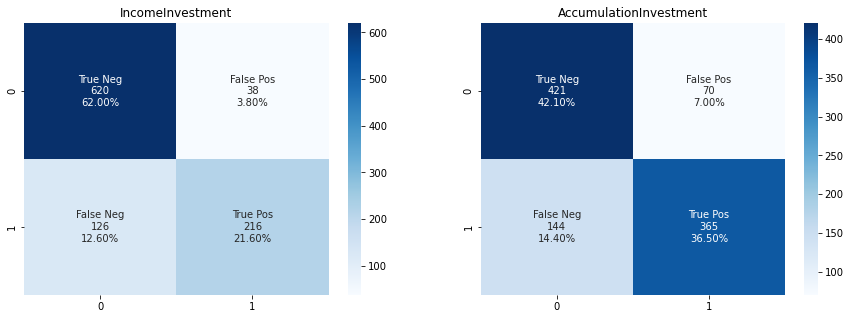

In [9]:
#Valuation of random Forest models
confusionMat(predRFInc, predRFAcc)

The results of the models are very good. The precision and accuracy are very hight. We can try to improve the models via the hyperparameters.

Measures for IncomeInvestment:
Sensitivity = 48.83% ;  Specificity = 95.14% ; Precision = 83.92% ; F1 score = 61.74% ; Accuracy = 79.30% 

Measures for AccumulationInvestment
Sensitivity = 80.16% ;  Specificity = 64.77% ; Precision = 70.22% ; F1 score = 74.86% ; Accuracy = 72.60% 



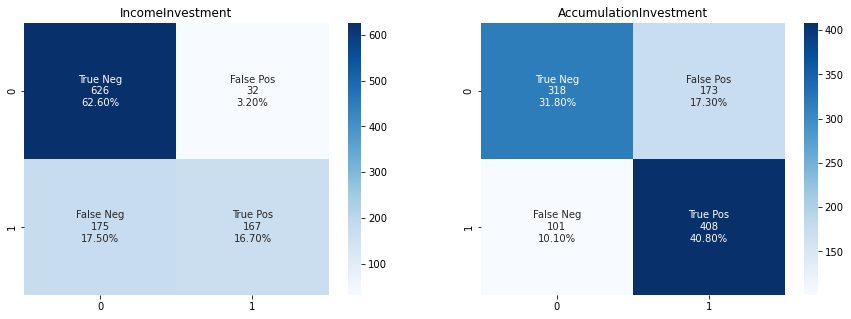

In [10]:
#Valuation of neural Networks models
ipre = (predNnInc > 0.5).astype(int)
apre = (predNnAcc > 0.4).astype(int)


confusionMat(ipre, apre)

Neural Networks model is fine for the IncomeInvestment model but for the AccumulationInvestment, is bad. We didn't exepct that so we can try to improve it. 

## Model Selection and explanations

As we have seen, before train some models, we have done some pre-modeling : interpretability methods that we use before selecting and developing our models. This has allow us to reduce de dimensionality of the problem.

With this new dataset, we have train models chosen on two purpose :
- Random Forest for is explainability : it's an in-model : by nature interpretable
- ANN for is modeling capacity. But this is a black box model thus it's a post-model (post-Hoc) : need interpretability techniques that try to enhance model interpretability after the model has been developed

We will proceed as follows :
- 1. Self interpret the predictions made by our models. We mean have a look to the result, try to find some pattern and have an idea about how data are distributed in the predictions
- 2. Do some local interpretability : on the results of the first step, if we have find some "cluster" describing the results, we will apply local methods on it
- 3. Practice global interpretability : we want to have an overall description of different models

We are going to use library like Lime, Shap or Yellowbrick.

[lien] https://towardsdatascience.com/understanding-machine-learning-interpretability-168fd7562a1a https://towardsdatascience.com/three-interpretability-methods-to-consider-when-developing-your-machine-learning-model-5bf368b47fac https://www.analyticsvidhya.com/blog/2020/03/6-python-libraries-interpret-machine-learning-models/

In [11]:
import shap
from lime import lime_tabular as LT

In [47]:
feature_names = ["Age", "FinancialEducation/RiskPropensity", "logIncome", "logWealth"]

#let's try to recup cluster
#predRFInc
#predNnInc
#
## AccumuulentInvt prediction
#predRFAcc
#predNnAcc

X_inter = np.insert(X_test,4, predRFAcc, axis=1)
X_need = X_inter[(X_inter[:,4] == 1)]
X_noneed = X_inter[(X_inter[:,4] == 0)]

#df_need = pd.DataFrame(X_need, columns= ["Age", "FinancialEducation/RiskPropensity", "logIncome", "logWealth", "Need"])
%store -r data_mean
%store -r data_std
#["Age","Gender", "FamilyMembers", "FinancialEducation", "RiskPropensity", "logIncome", "logWealth"]
mean = [data_mean[0], data_mean[3]/data_mean[4], data_mean[5], data_mean[6],0]
std = [data_std[0], data_std[3]/data_std[4], data_std[5], data_std[6],1]
X_need_noscale = X_need*std+mean
df_need = pd.DataFrame(X_need, columns= ["Age", "FinancialEducation/RiskPropensity", "logIncome", "logWealth", "Need"])
df_need_noscale = pd.DataFrame(X_need_noscale, columns= ["Age", "FinancialEducation/RiskPropensity", "logIncome", "logWealth", "Need"])
df_need_noscale.describe()



,Age,FinancialEducation/RiskPropensity,logIncome,logWealth,Need
count,435.000000,435.000000,435.000000,435.000000,435.0
mean,54.310345,1.451850,4.278644,4.281283,1.0
std,12.076094,38.972458,0.573821,0.835330,0.0
min,24.000000,-703.465770,1.289726,2.342349,1.0
25%,45.000000,1.095920,3.885429,3.574898,1.0
50%,54.000000,1.899588,4.293869,4.159979,1.0
75%,63.000000,2.573690,4.727979,4.842375,1.0
max,92.000000,384.447699,5.900783,7.183172,1.0


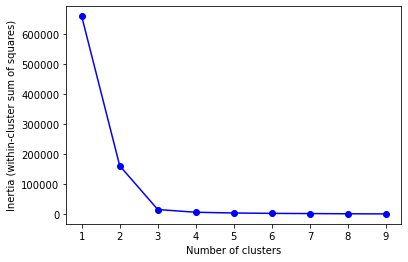

In [48]:
#let's see if there is some cluster inside

from sklearn.cluster import KMeans

Ks = range(1, 10)
inertia = [KMeans(i).fit(df_need.drop("Need", axis=1)).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [53]:
#let's do with 3
model = KMeans(n_clusters=3)
model.fit(df_need.drop("Need", axis=1))

cluster = (model.cluster_centers_*std[0:4]+mean[0:4])
print(cluster)

a, count = np.unique(model.labels_, return_counts=True)
print("classes",a,"distributed as :", count)


[[  54.2817552     2.19531812    4.28038686    4.28070053]
 [  65.         -703.46576968    3.8714162     4.77325604]
 [  56.          384.44769946    3.93114338    4.04159072]]
classes [0 1 2] distributed as : [433   1   1]


Text(0, 0.5, 'ratio')

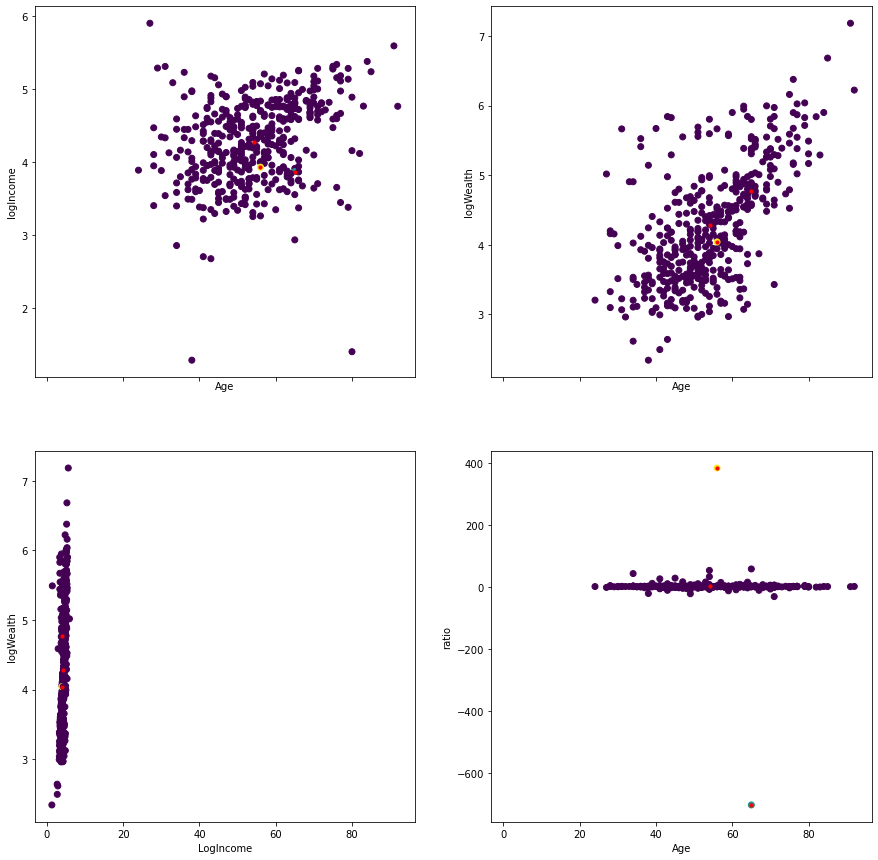

In [54]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(15,15))

axes[0,0].scatter(df_need_noscale["Age"], df_need_noscale["logIncome"], c=model.labels_ )
axes[0,0].scatter(cluster[:,0], cluster[:,2], c="r", s=10)
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("logIncome")

axes[0,1].scatter(df_need_noscale["Age"], df_need_noscale["logWealth"], c=model.labels_)
axes[0,1].scatter(cluster[:,0], cluster[:,3], c="r", s=10)
axes[0,1].set_xlabel("Age")
axes[0,1].set_ylabel("logWealth")

axes[1,0].scatter(df_need_noscale["logIncome"], df_need_noscale["logWealth"], c=model.labels_)
axes[1,0].scatter(cluster[:,2], cluster[:,3], c="r", s=10)
axes[1,0].set_xlabel("LogIncome")
axes[1,0].set_ylabel("logWealth")

axes[1,1].scatter(df_need_noscale["Age"], df_need_noscale["FinancialEducation/RiskPropensity"], c=model.labels_)
axes[1,1].scatter(cluster[:,0], cluster[:,1], c="r", s=10)
axes[1,1].set_xlabel("Age")
axes[1,1].set_ylabel("ratio")

In [16]:
# this was when i was using non scale variable : do i have to ?
#let's do with 2 because we see some similarities : 
# first 3 have just different ratio and age
# last 2 have same for all exept age
# so we expect to have : cluster with [? ? ~4 ~4.5] and [? 2 ~4 ~4]
model = KMeans(n_clusters=2)
model.fit(df_need_noscale.drop("Need", axis=1))
print(model.cluster_centers_)

[[  54.28571429    3.07608397    4.27958216    4.28014959]
 [  65.         -703.46576968    3.8714162     4.77325604]]


In [17]:
#avec les non need
X_noneed_noscale = X_noneed*std+mean
df_need = pd.DataFrame(X_noneed, columns= ["Age", "FinancialEducation/RiskPropensity", "logIncome", "logWealth", "Need"])
df_noneed_noscale = pd.DataFrame(X_noneed_noscale, columns= ["Age", "FinancialEducation/RiskPropensity", "logIncome", "logWealth", "Need"])

df_noneed = pd.DataFrame(X_noneed, columns= ["Age", "FinancialEducation/RiskPropensity", "logIncome", "logWealth", "Need"])
df_noneed_noscale.describe()

,Age,FinancialEducation/RiskPropensity,logIncome,logWealth,Need
count,565.000000,565.000000,565.000000,565.000000,565.0
mean,55.152212,2.374864,3.547469,4.017696,0.0
std,11.474834,12.474445,0.802639,0.944686,0.0
min,18.000000,-200.036052,0.430330,0.057911,0.0
25%,48.000000,1.168357,3.026517,3.567063,0.0
50%,55.000000,1.951670,3.622049,4.180661,0.0
75%,63.000000,2.558799,4.145535,4.698654,0.0
max,85.000000,132.495859,5.271818,5.511325,0.0


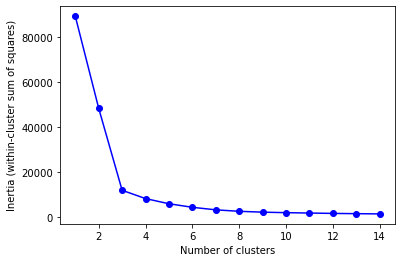

In [18]:
#let's see if there is some cluster inside

from sklearn.cluster import KMeans

Ks = range(1, 15)
inertia = [KMeans(i).fit(df_noneed.drop("Need", axis=1)).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()



In [19]:
#let's do with 5 (best will be 10 but to much)
model = KMeans(n_clusters=5)
model.fit(df_noneed.drop("Need", axis=1))
print(model.cluster_centers_*std[0:4]+mean[0:4])

a, count = np.unique(model.labels_, return_counts=True)
print(count)
cluster = (model.cluster_centers_*std[0:4]+mean[0:4])


[[  55.18018018    1.81890279    3.54444264    4.01593917]
 [  53.         -200.03605211    4.03749228    4.22201826]
 [  47.5          72.59385329    2.78511137    3.68293449]
 [  55.6          28.09940314    3.844935      4.43336752]
 [  55.          123.32918408    4.16104425    3.69866861]]
[555   1   2   5   2]


Text(0, 0.5, 'ratio')

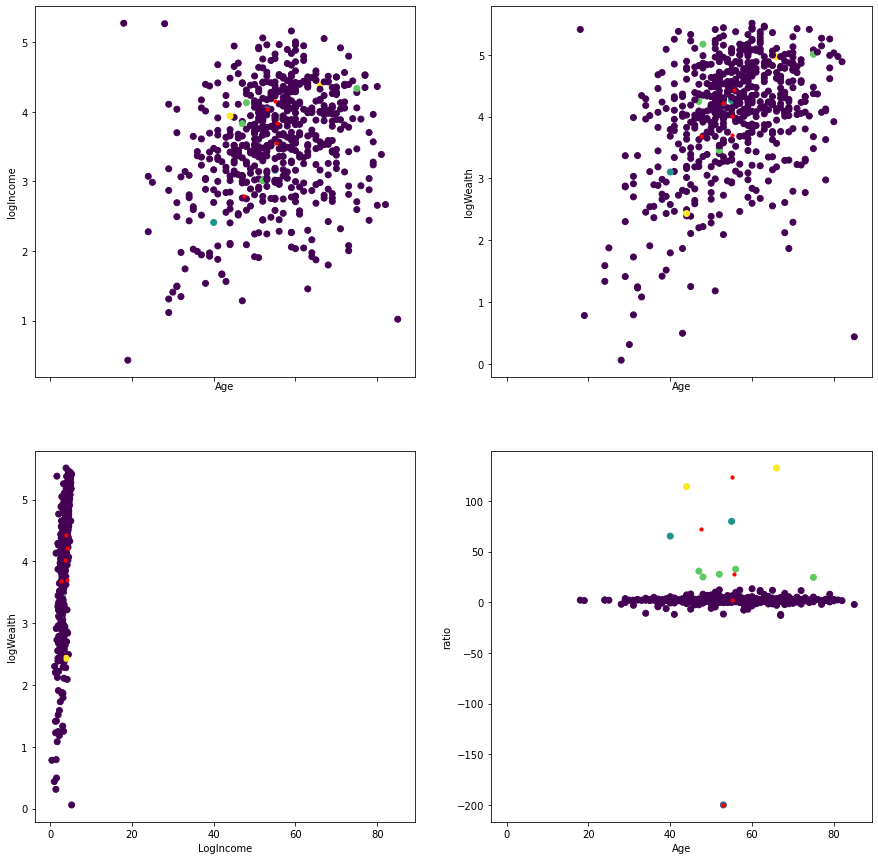

In [20]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(15,15))

axes[0,0].scatter(df_noneed_noscale["Age"], df_noneed_noscale["logIncome"], c=model.labels_ )
axes[0,0].scatter(cluster[:,0], cluster[:,2], c="r", s=10)
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("logIncome")

axes[0,1].scatter(df_noneed_noscale["Age"], df_noneed_noscale["logWealth"], c=model.labels_)
axes[0,1].scatter(cluster[:,0], cluster[:,3], c="r", s=10)
axes[0,1].set_xlabel("Age")
axes[0,1].set_ylabel("logWealth")

axes[1,0].scatter(df_noneed_noscale["logIncome"], df_noneed_noscale["logWealth"], c=model.labels_)
axes[1,0].scatter(cluster[:,2], cluster[:,3], c="r", s=10)
axes[1,0].set_xlabel("LogIncome")
axes[1,0].set_ylabel("logWealth")

axes[1,1].scatter(df_noneed_noscale["Age"], df_noneed_noscale["FinancialEducation/RiskPropensity"], c=model.labels_)
axes[1,1].scatter(cluster[:,0], cluster[:,1], c="r", s=10)
axes[1,1].set_xlabel("Age")
axes[1,1].set_ylabel("ratio")

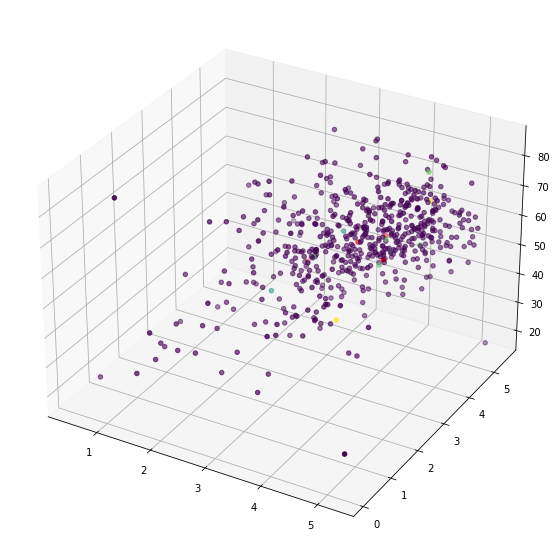

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_noneed_noscale["logIncome"], df_noneed_noscale["logWealth"],df_noneed_noscale["Age"], c=model.labels_ ) 
ax.scatter(cluster[:,2], cluster[:,3],cluster[:,0], c="r" ) 

plt.show()


In [22]:
#let's do with 2 because we see some similarities : 
# first 3 have just different ratio and age
# last 2 have same for all execpt ratio
# so we expect to have : cluster with [? ? ~3.5 ~4] and [53 ? ~3.5 ~4]

model = KMeans(n_clusters=2)
model.fit(df_noneed.drop("Need", axis=1))
print(model.cluster_centers_*std[0:4]+mean[0:4])


[[  55.15602837    2.73374847    3.54660045    4.01733383]
 [  53.         -200.03605211    4.03749228    4.22201826]]


# How to conclude on this ??

did i need to scale ??

for accu : 

- Need : 
- No need :

do the same for inc

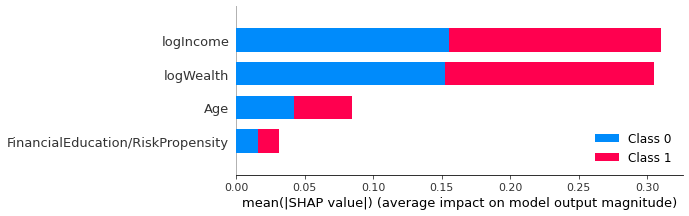

In [ ]:
# let's do some interpretability

#shap.initjs()#this line is required for enabling JS with shap lib
explainer = shap.TreeExplainer(rfModAcc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=feature_names)

In [31]:
explainer = shap.TreeExplainer(rfModAcc)
values = explainer(X_train)


# Jarrive pas bien a comprendre comment utiliser shap bien comme il faut

In [39]:
lime = LT.LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=['No need', 'Need'],
    mode='classification'
)

exp = lime.explain_instance(
    data_row=X_test[0], 
    predict_fn=rfModAcc.predict_proba
)
exp.show_in_notebook(show_table=True)
